In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [83]:
df = pd.read_csv('gff.tsv',sep='\t')

In [84]:
df.head()

,seq_id,source,type,start,end,score,strand,phase,attributes
0,chr17,RefSeq,exon,6811330,6811453,.,+,.,Parent=XM_001475631.1
1,chr17,RefSeq,CDS,6808204,6808245,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
2,chr17,RefSeq,CDS,6811792,6811869,.,+,2,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
3,chr17,RefSeq,exon,6806513,6806553,.,+,.,Parent=XM_001475631.1
4,chr17,RefSeq,five_prime_UTR,6806513,6806526,.,+,.,Parent=XM_001475631.1


In [85]:
df.shape

(512, 9)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   seq_id      512 non-null    object
 1   source      512 non-null    object
 2   type        512 non-null    object
 3   start       512 non-null    int64 
 4   end         512 non-null    int64 
 5   score       512 non-null    object
 6   strand      512 non-null    object
 7   phase       512 non-null    object
 8   attributes  512 non-null    object
dtypes: int64(2), object(7)
memory usage: 36.1+ KB


Какое значение атрибута Parent самое частое?

In [87]:
import re

In [88]:
pattern = re.compile(r'\d\d')

In [89]:
pattern.findall('hello, i am 50 and 78 or 6')

['50', '78']

In [90]:
pattern = re.compile(r'Parent=')

In [91]:
df.attributes.unique()

array(['Parent=XM_001475631.1',
       'Name=CDS:NC_000083.5:LOC100040603;Parent=XM_001475631.1,',
       'ID=XM_001475631.1;Parent=NC_000083.5:LOC100040603',
       'ID=;Parent=XM_001475631.1'], dtype=object)

In [92]:
df.attributes.value_counts()

attributes
Parent=XM_001475631.1                                       280
Name=CDS:NC_000083.5:LOC100040603;Parent=XM_001475631.1,    170
ID=XM_001475631.1;Parent=NC_000083.5:LOC100040603            33
ID=;Parent=XM_001475631.1                                    29
Name: count, dtype: int64

In [93]:
# решение при помощи методов PYTHON

In [109]:
df['atr_par'] = df.attributes.str.split('Parent=').replace(',','')

In [145]:
pattern = re.compile(r'(\d)')

In [146]:
for i in df.attributes:
    pattern.search(i)
    print(i)

Parent=XM_001475631.1
Name=CDS:NC_000083.5:LOC100040603;Parent=XM_001475631.1,
Name=CDS:NC_000083.5:LOC100040603;Parent=XM_001475631.1,
Parent=XM_001475631.1
Parent=XM_001475631.1
Parent=XM_001475631.1
Name=CDS:NC_000083.5:LOC100040603;Parent=XM_001475631.1,
Parent=XM_001475631.1
ID=XM_001475631.1;Parent=NC_000083.5:LOC100040603
Name=CDS:NC_000083.5:LOC100040603;Parent=XM_001475631.1,
ID=XM_001475631.1;Parent=NC_000083.5:LOC100040603
Name=CDS:NC_000083.5:LOC100040603;Parent=XM_001475631.1,
Name=CDS:NC_000083.5:LOC100040603;Parent=XM_001475631.1,
Name=CDS:NC_000083.5:LOC100040603;Parent=XM_001475631.1,
Name=CDS:NC_000083.5:LOC100040603;Parent=XM_001475631.1,
ID=XM_001475631.1;Parent=NC_000083.5:LOC100040603
ID=;Parent=XM_001475631.1
Name=CDS:NC_000083.5:LOC100040603;Parent=XM_001475631.1,
Parent=XM_001475631.1
Parent=XM_001475631.1
Parent=XM_001475631.1
Parent=XM_001475631.1
Parent=XM_001475631.1
ID=XM_001475631.1;Parent=NC_000083.5:LOC100040603
Parent=XM_001475631.1
Parent=XM_001475631

In [107]:
df

,seq_id,source,type,start,end,score,strand,phase,attributes,atr_par
0,chr17,RefSeq,exon,6811330,6811453,.,+,.,Parent=XM_001475631.1,"[, XM_001475631.1]"
1,chr17,RefSeq,CDS,6808204,6808245,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...,"[Name=CDS:NC_000083.5:LOC100040603;, XM_001475..."
2,chr17,RefSeq,CDS,6811792,6811869,.,+,2,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...,"[Name=CDS:NC_000083.5:LOC100040603;, XM_001475..."
3,chr17,RefSeq,exon,6806513,6806553,.,+,.,Parent=XM_001475631.1,"[, XM_001475631.1]"
4,chr17,RefSeq,five_prime_UTR,6806513,6806526,.,+,.,Parent=XM_001475631.1,"[, XM_001475631.1]"
...,...,...,...,...,...,...,...,...,...,...
507,chr17,RefSeq,exon,6812219,6818159,.,+,.,Parent=XM_001475631.1,"[, XM_001475631.1]"
508,chr17,RefSeq,protein,6806527,6812289,.,+,.,ID=;Parent=XM_001475631.1,"[ID=;, XM_001475631.1]"
509,chr17,RefSeq,CDS,6806527,6806553,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...,"[Name=CDS:NC_000083.5:LOC100040603;, XM_001475..."
510,chr17,RefSeq,exon,6811792,6811869,.,+,.,Parent=XM_001475631.1,"[, XM_001475631.1]"


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   seq_id      512 non-null    object
 1   source      512 non-null    object
 2   type        512 non-null    object
 3   start       512 non-null    int64 
 4   end         512 non-null    int64 
 5   score       512 non-null    object
 6   strand      512 non-null    object
 7   phase       512 non-null    object
 8   attributes  512 non-null    object
 9   at_par      512 non-null    object
dtypes: int64(2), object(8)
memory usage: 40.1+ KB


In [14]:
df_type = df.type.value_counts()

C:\Users\Alex\AppData\Local\Temp\ipykernel_14592\969880254.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_type,palette='viridis')


<Axes: xlabel='type', ylabel='count'>

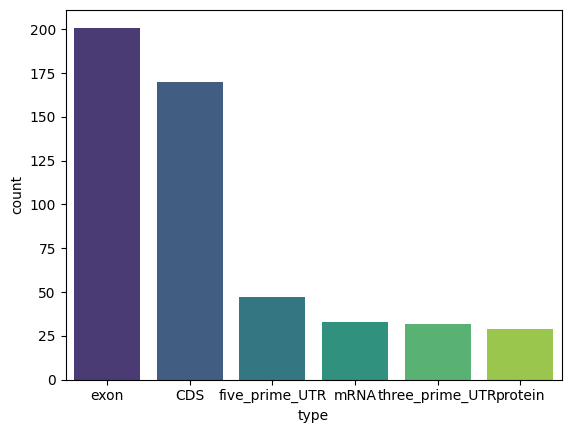

In [16]:
sns.barplot(data=df_type,palette='viridis')